<a href="https://colab.research.google.com/github/palash04/Artificial-Intelligence/blob/master/Neural_Networks/RNN/_02_Predicting_Stock_Price_of_Google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Google Stock Price Dataset from 2012 to 2016
![Screenshot 2020-07-16 at 12 58 59](https://user-images.githubusercontent.com/26361028/87640291-2040dc00-c764-11ea-9473-d374896b430e.png)

We will be training on this dataset using LSTM

# Our Goal - To predict stock prices (upward/downward trend) for the first month (January, excluding financial days(sat,sunday)) of 2017.

In [1]:
trainfilepath = '/content/drive/My Drive/Artificial Intelligence/DataSet/RNN/Google_Stock_Price_Train.csv'
testfilepath = '/content/drive/My Drive/Artificial Intelligence/DataSet/RNN/Google_Stock_Price_Test.csv'

# Part 1 - Data Preprocessing

### Importing the libraries

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training dataset

In [3]:
dataset_train = pd.read_csv(trainfilepath)
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
training_set.shape

(1258, 1)

In [5]:
training_set[0:5]   # first 5 open stock prices

array([[325.25],
       [331.27],
       [329.83],
       [328.34],
       [322.04]])

### Feature scaling

![Screenshot 2020-07-16 at 13 22 20](https://user-images.githubusercontent.com/26361028/87642607-6186bb00-c767-11ea-8c57-a1c32b84755c.png)


In [6]:
# Feature scaling
# We will use Normalization, also it is recommended to use Normaliazation when doing RNN
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))        # squishes the values between 0 and 1
training_set_scaled = sc.fit_transform(training_set)

In [7]:
training_set_scaled[0:5]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225]])

### Creating a data structure with 60 timesteps and 1 output

60 timesteps corresponds to 60 previous stock prices for 60 financial days i.e over 3 months. 
So, we will be looking at 3 months data to predict the next stock price (which will at t+1).


In [16]:
# 60 previous stock prices in X_train
# and next stock price in y_train
# This we will do for every T
X_train = []
y_train = []

for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [17]:
print (X_train.shape)
print (y_train.shape)

(1198, 60)
(1198,)


In [18]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [19]:
X_train[0]

array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
       0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
       0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
       0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
       0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
       0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
       0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
       0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
       0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
       0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
       0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
       0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656])

### Reshaping

In [20]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [21]:
X_train.shape

(1198, 60, 1)

# Part 2 - Building the RNN

### Importing the keras libraries and packages

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initializing the RNN

In [23]:
regressor = Sequential()    # using regression here, since we are predicting continous values

### Adding a first LSTM layer and some Dropout regularization

In [24]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))   # 50 neurons in the first LSTM layer
regressor.add(Dropout(rate=0.2))

### Adding a second LSTM layer and some Dropout Regulaization

In [25]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

### Adding a third LSTM layer and some Dropout Regulaization

In [26]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

### Adding a fourth LSTM layer and some Dropout Regulaization

In [27]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(rate=0.2))

### Adding the output layer

In [28]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [29]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

### Fitting the RNN to the Training set

In [30]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0426
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0071
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0064
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0057
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0050
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0060
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0051
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0053
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0046
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0046
Epoch 11/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0043
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step - lo

# Part 3 - Making predictions and visualizng the results

### Getting the real stock price of 2017

In [31]:
dataset_test = pd.read_csv(testfilepath)
real_stock_price = dataset_test.iloc[:, 1:2].values

In [33]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

### Getting the predicted stock price of 2017

In [34]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60 : ].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60,80):
  X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [35]:
predicted_stock_price

array([[767.6691 ],
       [765.17365],
       [764.9439 ],
       [765.9478 ],
       [768.7716 ],
       [773.9542 ],
       [779.1526 ],
       [781.8526 ],
       [782.6537 ],
       [782.583  ],
       [782.2836 ],
       [781.90186],
       [781.58307],
       [781.8741 ],
       [782.63965],
       [786.451  ],
       [792.58905],
       [799.555  ],
       [803.9496 ],
       [801.3857 ]], dtype=float32)

### Visualizing the results

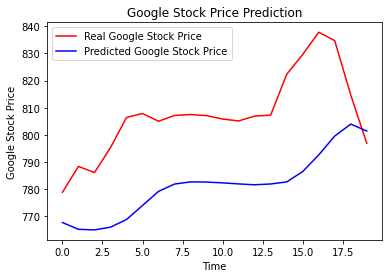

In [36]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()